<a href="https://colab.research.google.com/github/Rigved19/Machine-Learning-Projects/blob/main/ML%20Clustering%20Algorithms/Successful_Clustering%20_Using_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

import numpy as np
import pandas as pd
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans , MeanShift , DBSCAN
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [13]:
data = pd.read_csv ("/content/unlabelled_data.csv")

In [14]:
data.head()

,Id,Speed,RPM,Engine Load
0,131505,7,898,44
1,133384,7,898,44
2,131504,1,917,32
3,133424,1,917,32
4,131503,0,774,38


In [15]:
## Data Cleaning
df = data[data["Speed"] != 0]   #Deleting Rows with Speed Value as 0

In [16]:
for x in range(df.shape[0]):     #Frontfilling RPM = 0 values
  if df.iloc[x]["RPM"] == 0:
    df.iloc[x]["RPM"] = df.iloc[x-1]["RPM"]  

a = df[df["Engine Load"] == 0 ].index
df.drop(a , axis = 0 , inplace = True)     

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
##Deleting Rows having RPM Values lower than 1000
idx = df[df["RPM"] < 1000].index
df1 = df.drop( idx, axis = 0)

idx =  df1[df1["RPM"] > 2500].index
df1 = df1.drop (idx , axis = 0)

idx = df1[df1["Speed"] > 90].index
df1 = df1.drop (idx , axis = 0)

In [18]:
count  = df1[df1["RPM"] < 1000]
print(count)

Empty DataFrame
Columns: [Id, Speed, RPM, Engine Load]
Index: []


In [19]:
train = df1.copy()
x = train["Speed"].to_numpy()
y = train["RPM"].to_numpy()
X = train.iloc[:,[1,2]].values

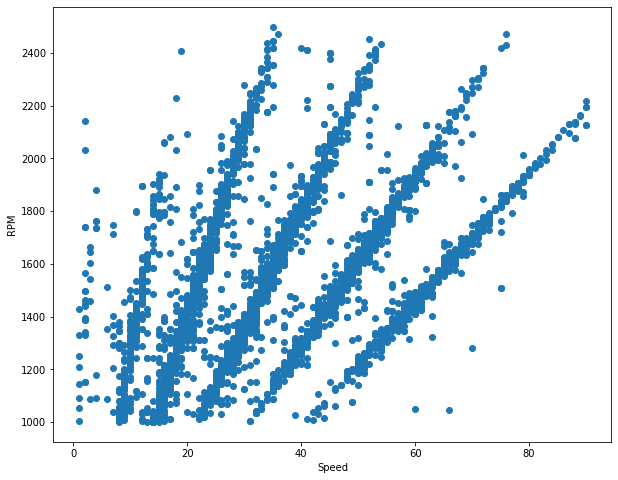

In [20]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x , y)
plt.show()

In [21]:
## Scaling the Data
y_reshaped = y.reshape(-1,1)
x_reshaped = x.reshape(-1,1)
Standard = StandardScaler()
MinMax1 = MinMaxScaler(feature_range = (0.001,1))
y_scaled = MinMax1.fit_transform(y_reshaped)
MinMax2 = MinMaxScaler(feature_range = (0.001,1))
x_scaled = MinMax2.fit_transform(x_reshaped)
X_scaled = np.concatenate( (x_scaled , y_scaled) , axis = 1)  
#y_scaled= Standard.fit_transform(y_reshaped)
#x_scaled= Standard.fit_transform(x_reshaped)

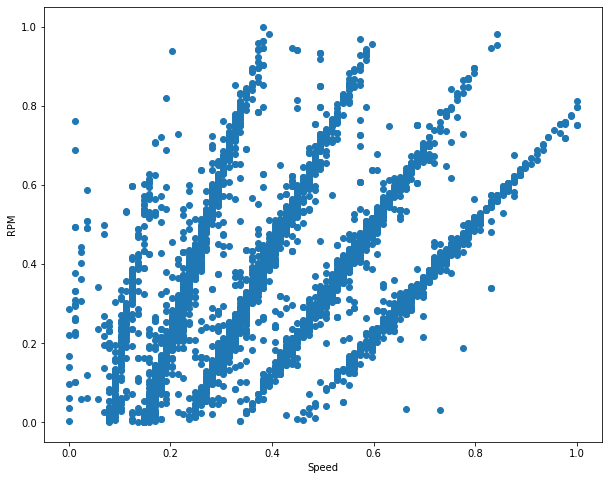

In [22]:
plt.figure(figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled)
plt.show()

In [24]:
###Taking  eps/min = 0.11/5 and eps/min 0.12/7
##Using DBSCAN 
model1 = DBSCAN(eps = 0.021 , min_samples=5)

clusters1 = model1.fit_predict(X_scaled)
n_clusters1 = len(set(clusters1))
print("Model1 Clusters" , clusters1)
print("No. of clusters" , n_clusters1)

model2 = DBSCAN(eps= 0.0201 , min_samples=5)

clusters2 = model2.fit_predict(X_scaled)
n_clusters2 = len(set(clusters2))
print("Model2 Clusters" , clusters2)
print("No. of clusters" , n_clusters2)


Model1 Clusters [0 0 0 ... 0 3 3]
No. of clusters 16
Model2 Clusters [0 0 0 ... 0 3 3]
No. of clusters 17


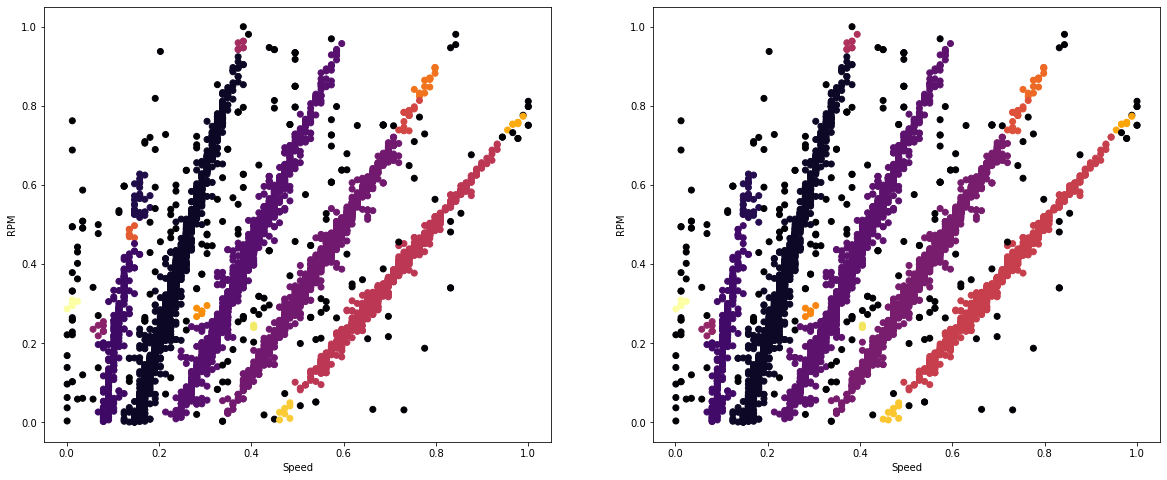

In [25]:
plt.figure( figsize=(20,8))
plt.subplot (1,2,1)
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = clusters2, cmap="inferno")

plt.subplot(1,2,2)
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = clusters1, cmap="inferno")

In [26]:
df1["Cluster Labels"] = clusters1
p = df1.index
print(p)

Int64Index([   59,    60,    64,    65,    66,    67,    68,    69,    83,
               88,
            ...
            13481, 13508, 13513, 13554, 13593, 13598, 13599, 13606, 13616,
            13617],
           dtype='int64', length=7164)


In [27]:
colors = {}
df1["row_no"] = range(df1.shape[0])
for i in range(1,15) :
  colors["clr" + str(i)] = np.zeros_like(clusters1)
  a = df1[df1["Cluster Labels"] == i].index 
  p = colors["clr"+str(i)]
  for x in a :
    row = df1.loc[x]["row_no"]
    p[row] = df1.loc[x]["Cluster Labels"]



In [28]:
colors["clr" + str(0)] = np.ones_like(clusters1)
colors["clr" + str(-1)] = np.zeros_like(clusters1)
a = df1[df1["Cluster Labels"] == 0].index
p = colors["clr"+str(0)]
for x in a :
  row = df1.loc[x]["row_no"]
  p[row] = df1.loc[x]["Cluster Labels"]

a = df1[df1["Cluster Labels"] == -1].index
p = colors["clr"+str(-1)]
for x in a :
  row = df1.loc[x]["row_no"]
  p[row] = df1.loc[x]["Cluster Labels"]


In [29]:
print(df1.head(10))
print(colors)

        Id  Speed   RPM  Engine Load  Cluster Labels  row_no
59  135548     25  1783           43               0       0
60  135547     24  1654            1               0       1
64  135675     15  1353            9               0       2
65  135790     24  1706           41               0       3
66  135738     24  1706           41               0       4
67  135830     25  1783           31               0       5
68  135829     26  1778           20               0       6
69  135909     22  1550            9               0       7
83  136450      2  1396           55              -1       8
88  136617     17  1240           72               0       9
{'clr1': array([0, 0, 0, ..., 0, 0, 0]), 'clr2': array([0, 0, 0, ..., 0, 0, 0]), 'clr3': array([0, 0, 0, ..., 0, 3, 3]), 'clr4': array([0, 0, 0, ..., 0, 0, 0]), 'clr5': array([0, 0, 0, ..., 0, 0, 0]), 'clr6': array([0, 0, 0, ..., 0, 0, 0]), 'clr7': array([0, 0, 0, ..., 0, 0, 0]), 'clr8': array([0, 0, 0, ..., 0, 0, 0]), 'clr9': 

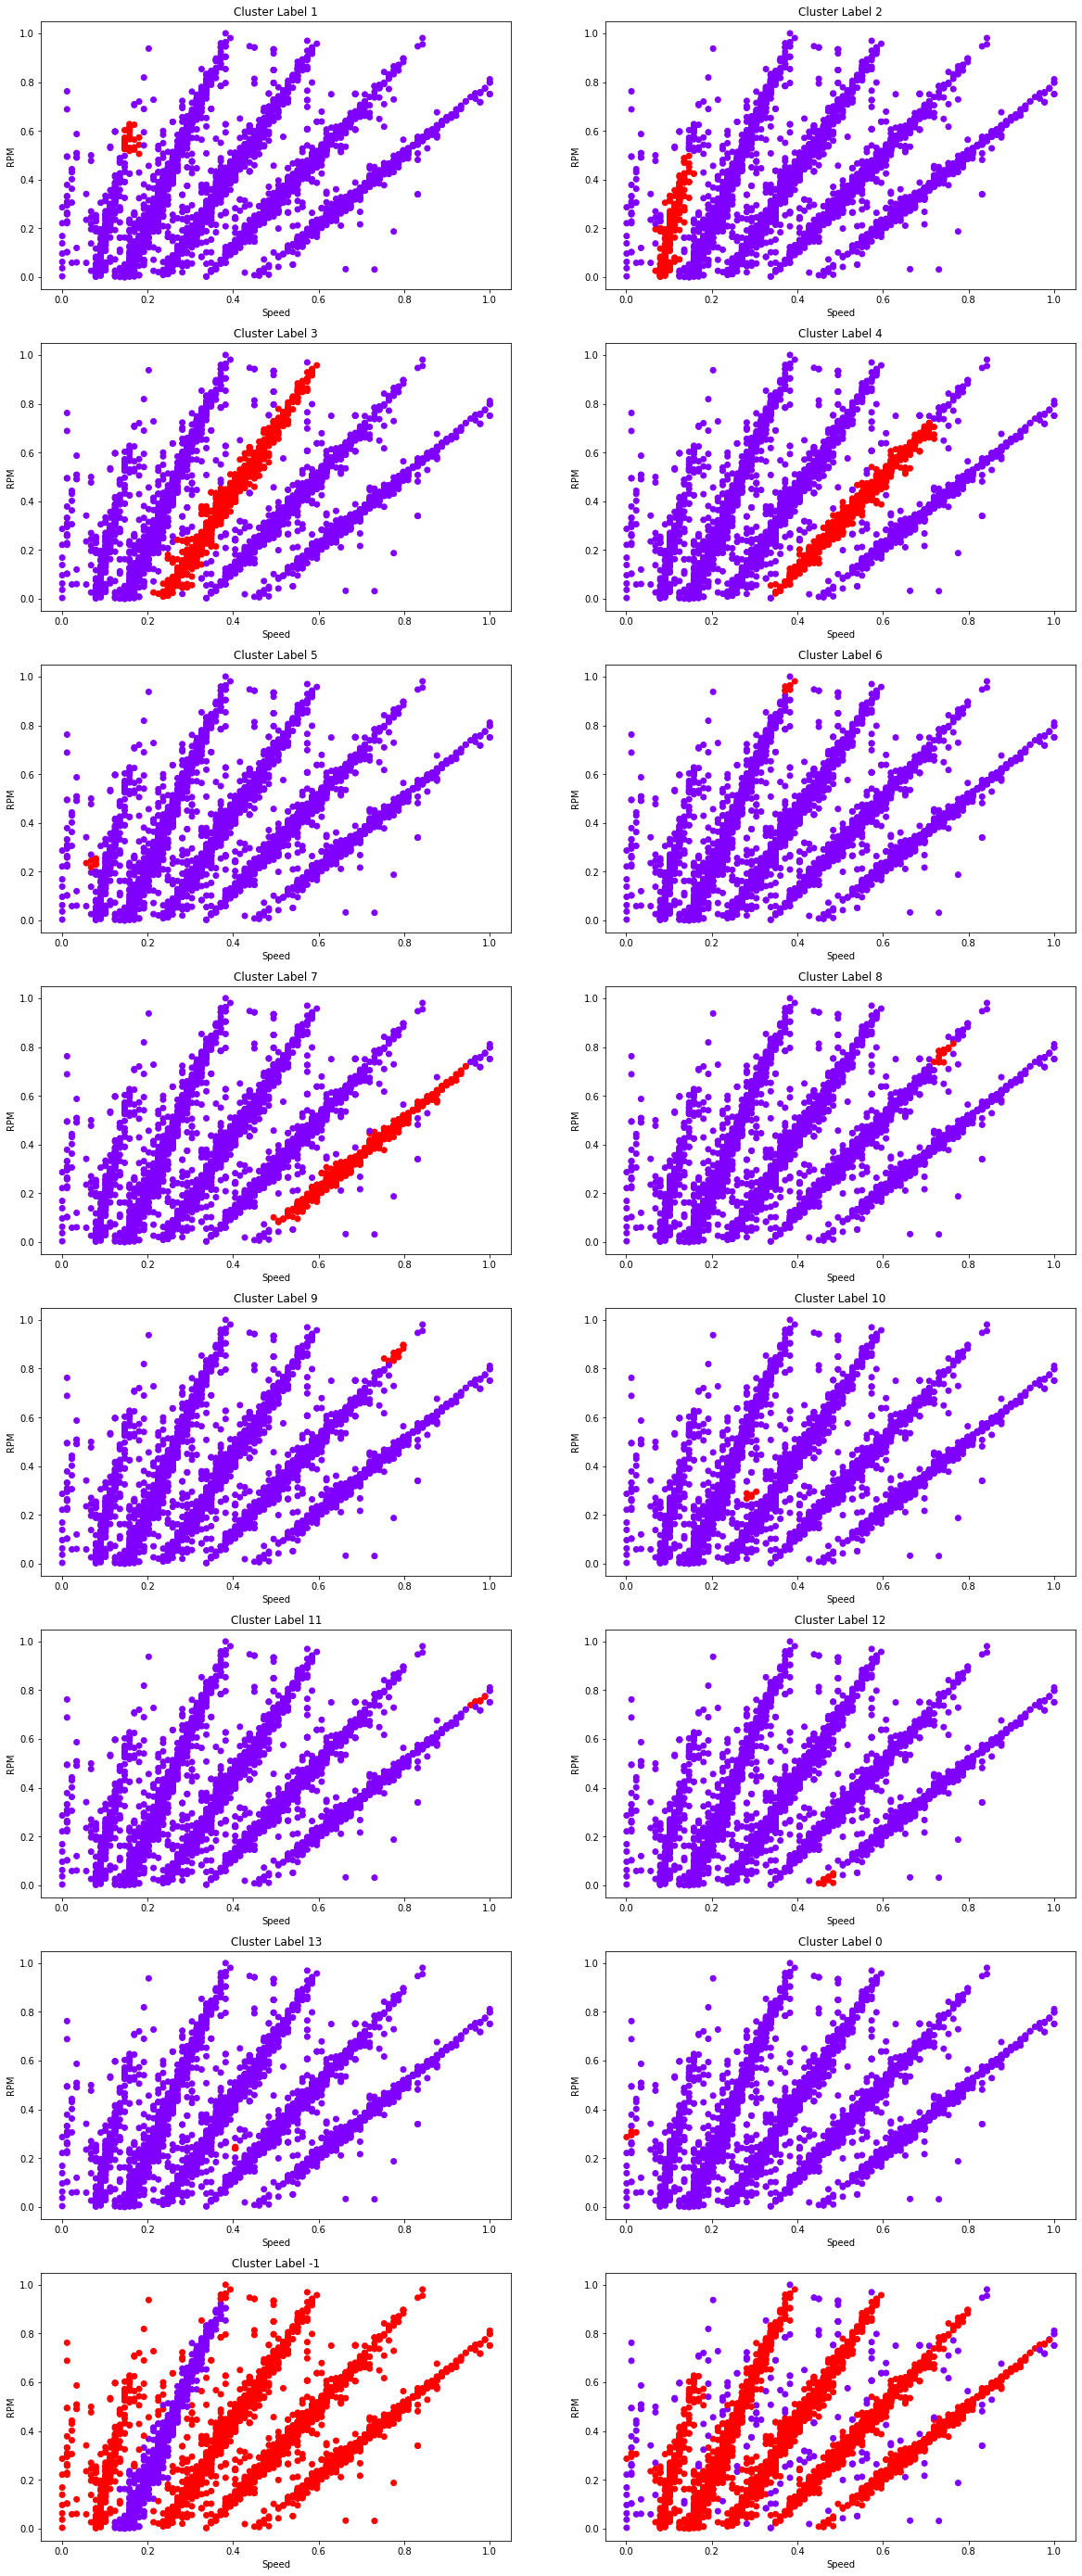

In [30]:
plt.figure( figsize=(20,50))
for i in range(1,15) :
  plt.subplot (8,2,i)
  plt.title( "Cluster Label " + str(i))
  plt.xlabel("Speed")
  plt.ylabel("RPM") 
  plt.scatter(x_scaled , y_scaled , c = colors["clr" + str(i)], cmap="rainbow")

plt.title( "Cluster Label " + str(0))
plt.subplot (8,2,15)
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = colors["clr" + str(0)], cmap="rainbow")

plt.title( "Cluster Label " + str(-1))
plt.subplot (8,2,16)
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = colors["clr" + str(-1)], cmap="rainbow")

In [31]:
gear = np.zeros_like(clusters1)
for a in range(len(clusters1)):
  if df1.iloc[a]["Cluster Labels"] == 0 :
    gear[a] = 2

  elif df1.iloc[a]["Cluster Labels"] == 1 :
    gear[a] = -1

  elif df1.iloc[a]["Cluster Labels"] == 2 :
    gear[a] = -1

  elif df1.iloc[a]["Cluster Labels"] == 3 :
    gear[a] = 3

  elif df1.iloc[a]["Cluster Labels"] == 4:
   gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 5 :
    gear[a] = -1

  elif df1.iloc[a]["Cluster Labels"] == 6 :
    gear[a] = 2

  elif df1.iloc[a]["Cluster Labels"] == 7 :
    gear[a] = 5

  elif df1.iloc[a]["Cluster Labels"] == 8 :
    gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 9 :
    gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 10 :
    gear[a] = 3

  elif df1.iloc[a]["Cluster Labels"] == 11 :
    gear[a] = 5

  elif df1.iloc[a]["Cluster Labels"] == 12 :
    gear[a] = 5

  elif df1.iloc[a]["Cluster Labels"] == 13 :
    gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 14 :
    gear[a] = 1 

  

In [32]:
df1["Gear No._DBSCAN"] = gear

a = df1.index
f_gear = np.zeros(data.shape[0])
for x in a:
  f_gear[x] = df1.loc[x]["Gear No._DBSCAN"] 
f_gear[59]

data["Gear No._DBSCAN"] = f_gear
data.to_csv("dbscan_ouput.csv")

In [36]:
data.head(70)

,Id,Speed,RPM,Engine Load,Gear No._DBSCAN
0,131505,7,898,44,0.0
1,133384,7,898,44,0.0
2,131504,1,917,32,0.0
3,133424,1,917,32,0.0
4,131503,0,774,38,0.0
...,...,...,...,...,...
65,135790,24,1706,41,2.0
66,135738,24,1706,41,2.0
67,135830,25,1783,31,2.0
68,135829,26,1778,20,2.0


In [35]:
from sklearn import metrics
"""
# Create empty lists
S=[] # this is to store Silhouette scores
comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(1,7) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,11)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(X_scaled)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X_scaled, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()
"""

'\n# Create empty lists\nS=[] # this is to store Silhouette scores\ncomb=[] # this is to store combinations of epsilon / min_samples\n\n# Define ranges to explore\neps_range=range(1,7) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range\nminpts_range=range(3,11)\n\nfor k in eps_range:\n    for j in minpts_range:\n        # Set the model and its parameters\n        model = DBSCAN(eps=k/100, min_samples=j)\n        # Fit the model \n        clm = model.fit(X_scaled)\n        # Calculate Silhoutte Score and append to a list\n        S.append(metrics.silhouette_score(X_scaled, clm.labels_, metric=\'euclidean\'))\n        comb.append(str(k)+"|"+str(j)) # axis values for the graph\n\n# Plot the resulting Silhouette scores on a graph\nplt.figure(figsize=(16,8), dpi=300)\nplt.plot(comb, S, \'bo-\', color=\'black\')\nplt.xlabel(\'Epsilon/100 | MinPts\')\nplt.ylabel(\'Silhouette Score\')\nplt.title(\'Silhouette Score based on different combnation of Hyperparameters\')\